## 從ETtoday旅遊雲爬出在台北的旅遊景點的文章標題

#### 參考網站：
>
> [ETtoday旅遊雲](https://travel.ettoday.net/category/%E5%8F%B0%E5%8C%97/?from=travel_MainMenu_PC)
>
> [爬蟲方式參考](https://www.learncodewithmike.com/2020/02/python-beautifulsoup-web-scraper.html)
>
> [Requests套件介紹](https://ithelp.ithome.com.tw/articles/10220161)
>
> [python-dictionary-to-json](https://www.geeksforgeeks.org/how-to-convert-python-dictionary-to-json/)
>
> [Python – Save List to CSV](https://www.geeksforgeeks.org/python-save-list-to-csv/)
>
> [Python將list元素轉存爲CSV文件](twblogs.net/a/5b8dfcd12b71771883421139)
>
> [Python Tutorial: Working with CSV file for Data Science](https://www.analyticsvidhya.com/blog/2021/08/python-tutorial-working-with-csv-file-for-data-science/)
>
> [CSV File Reading and Writing](https://docs.python.org/3/library/csv.html)
>
> using csv.writer method from CSV package!
>
> [爬取現在天氣](https://steam.oxxostudio.tw/category/python/spider/current-weather.html)

#### 名詞解釋：
>
> [URL(Uniform Resource Locator)統一資源定位器：](https://zh.wikipedia.org/zh-tw/%E7%BB%9F%E4%B8%80%E8%B5%84%E6%BA%90%E5%AE%9A%E4%BD%8D%E7%AC%A6)簡稱網址，是網際網路上標準的資源的位址（Address），如同在網路上的門牌。
>
> [HTTP(HyperText Transfer Protocol)超文本傳輸協定：](https://developer.mozilla.org/zh-TW/docs/Web/HTTP)用來傳輸超媒體文件(像是HTML 文件) 的應用層協定，被設計來讓瀏覽器和伺服器進行溝通，但也可做其他用途。
>
> [Response請求：](https://www.geeksforgeeks.org/response-methods-python-requests/)向 URI 發出請求時，它會返回響應。方法是 get、post、put 等。
>> response.headers：返回響應頭的字典。
>
> [rq.get(url)：](https://ithelp.ithome.com.tw/articles/10186119)response = rq.get(url)   。 用 requests 的 get 方法把網頁抓下來
>
> [response.text：](https://ithelp.ithome.com.tw/articles/10186119)html_doc = response.text 。 text 屬性就是 html 檔案

In [1]:
#抓取網頁原始碼(HTML)
import urllib.request as req
url = "https://travel.ettoday.net/category/%E5%8F%B0%E5%8C%97/?from=travel_MainMenu_PC"
with req.urlopen(url) as response:
    data = response.read().decode("utf-8")
#print(data)

request = req.Request(url,headers = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"})
with req.urlopen(url) as response:
    data = response.read().decode("utf-8")
#print(data)

import bs4 #beautifulsoup4
root = bs4.BeautifulSoup(data,"html.parser")
titles = root.find_all("div",class_ = "title") #尋找所有 class = "title" 的 div 標籤
#print(titles.a.string)
#print(titles)
#print(data)
print(root.title.string)

台北相關新聞懶人包, 照片, 影片, 報導, 資訊及訊息 -第1頁| ETtoday 旅遊雲 | ETtoday新聞雲


In [2]:
import requests
url = "https://travel.ettoday.net/category/%E5%8F%B0%E5%8C%97/?from=travel_MainMenu_PC"

from bs4 import BeautifulSoup #加入 #B,S大小寫有差嗎？

response = requests.get(url)
soup = BeautifulSoup(response.text,"html.parser")

#print(soup.prettify()) #輸出排版後的HTML內容
#find()：只搜尋第一個符合條件的HTML節點，傳入要搜尋的標籤名稱。
result = soup.find_all("h3", itemprop="headline", limit=3) 
#find_all()：搜尋網頁中所有符合條件的HTML節點，傳入要搜尋的HTML標籤名稱。
#limit=3：限定搜尋三個節點(搜尋結果只會出現三個)，若要全部出現則不用設限。
print(result)

[<h3 itemprop="headline">
<a href="https://travel.ettoday.net/article/2388033.htm?from=travel_Tag_list_PC" itemprop="url" title="逾60攤逛到爽！4foodie「聖誕美食樂園」有7米高摩天輪、旋轉木馬">逾60攤逛到爽！4foodie「聖誕美食樂園」有7米高摩天輪、旋轉木馬</a>
</h3>, <h3 itemprop="headline">
<a href="https://travel.ettoday.net/article/2387763.htm?from=travel_Tag_list_PC" itemprop="url" title="士林官邸菊展今開幕！15展區完工「星球必拍」　12／3有旺福、范逸臣">士林官邸菊展今開幕！15展區完工「星球必拍」　12／3有旺福、范逸臣</a>
</h3>, <h3 itemprop="headline">
<a href="https://travel.ettoday.net/article/2387429.htm?from=travel_Tag_list_PC" itemprop="url" title="「北歐麋鹿聖誕樹」降臨中山站！燈海隧道超夢幻　12／10有音樂會">「北歐麋鹿聖誕樹」降臨中山站！燈海隧道超夢幻　12／10有音樂會</a>
</h3>]


In [3]:
#利用get()取得href屬性值中的網址
titles = soup.find_all("h3", itemprop="headline")
for title in titles:
    print(title.select_one("a").get("href"))

https://travel.ettoday.net/article/2388033.htm?from=travel_Tag_list_PC
https://travel.ettoday.net/article/2387763.htm?from=travel_Tag_list_PC
https://travel.ettoday.net/article/2387429.htm?from=travel_Tag_list_PC
https://travel.ettoday.net/article/2386492.htm?from=travel_Tag_list_PC
https://travel.ettoday.net/article/2385755.htm?from=travel_Tag_list_PC
https://travel.ettoday.net/article/2385601.htm?from=travel_Tag_list_PC
https://travel.ettoday.net/article/2375033.htm?from=travel_Tag_list_PC
https://travel.ettoday.net/article/2382795.htm?from=travel_Tag_list_PC
https://travel.ettoday.net/article/2378600.htm?from=travel_Tag_list_PC
https://travel.ettoday.net/article/2379802.htm?from=travel_Tag_list_PC
https://travel.ettoday.net/article/2378540.htm?from=travel_Tag_list_PC
https://travel.ettoday.net/article/2381208.htm?from=travel_Tag_list_PC
https://travel.ettoday.net/article/2376803.htm?from=travel_Tag_list_PC
https://travel.ettoday.net/article/2380428.htm?from=travel_Tag_list_PC
https:

In [4]:
#取得<a>標籤的連結文字
titles = soup.find_all("h3", itemprop="headline")
for title in titles:
    print(title.select_one("a").getText())

逾60攤逛到爽！4foodie「聖誕美食樂園」有7米高摩天輪、旋轉木馬
士林官邸菊展今開幕！15展區完工「星球必拍」　12／3有旺福、范逸臣
「北歐麋鹿聖誕樹」降臨中山站！燈海隧道超夢幻　12／10有音樂會
內湖「落羽松秘境」草莓季報到！白草莓12月起盛產　價格、產季曝光
「歐洲聖誕市集」4日限定！逾40攤位有紅酒、傳統料理　主題屋必拍
士林官邸菊展11／25開跑！「綠雕披薩、花之隧道」展區亮點搶先看
準備揪團！全台人氣草莓園攻略　巨無霸紅潤香甜果實銷魂又欠吃
2022全台10大「最強飯店早餐」出爐！湖景旁吃早餐　百種料理吃到飽
朝聖北投「小日本秘境」夜泡紓壓！24小時營業、說走就走超方便
特搜追楓5大景點！入住老宅木屋賞絕美楓紅　打卡百年歷史雙拱橋
把握「關渡花海」最後時光！一年一度雪白波斯菊＋山巒雲海美翻了
精靈帳搬進飯店！「北市跨年3提案」飛鏢派對、美食吃超撐
食農好好玩／物價飆漲不如吃野菜！陽明山魔幻廚房「野菜捲DIY」超療癒
1.5萬坪「關渡花海」剩最後6天！免費接駁車資訊一次看
約會0失誤！信義區最美光雕換新片　冷冽標語、宇宙璀璨全上映
紓壓小旅行！新北投現存最古老日式浴場、青磺天然湧泉活絡筋骨
「台版小京都」在木柵！手水舍、花田鞦韆7設施　明年賞大片櫻花
美到12月！16個籃球場大「向日葵＋狼尾草」、8萬盆河濱花海在這


In [9]:
orgdata = print

----------------

### 將輸出資料存成csv.檔

In [5]:
#使用pandas套件
import pandas as pd

# read csv file
#須將csv檔與此程式碼檔案放置於同一資料夾內
a = pd.read_csv("save_dict_to_csv.csv",index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'save_dict_to_csv.csv'

In [6]:
#列出檔案前五筆資料
a.head()

NameError: name 'a' is not defined

In [10]:
orgdata.to_csv("crawler_to_csv.csv", index=False)

AttributeError: 'builtin_function_or_method' object has no attribute 'to_csv'

----------------

### 將輸出資料存成json.檔

In [6]:
d = {
    
  "編號": [
    {
      "1": {
        "標題": [
          "台北溫泉季賞玩攻略!免費專車、步行導覽只有2天 大眾湯買1送1"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2368174.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "2": {
        "標題": [
          "關渡秘境花海回來了!如1.5萬坪糖果灑一地　乾燥花DIY免費體驗"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2367195.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "3": {
        "標題": [
          "朝聖超火「藍寶石泉」！現飲極品冰涼山泉水　窺探寶石般透亮瀑布"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2363093.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "4": {
        "標題": [
          "訂房網限時3天優惠!機票最高折1000 入住日式高空浴場飯店1111元"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2366458.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "5": {
        "標題": [
          "「屏東觀光圈」必買伴手禮快閃松菸!蛋糕1分鐘賣1條、蛋捲紅到歐洲"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2363790.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "6": {
        "標題": [
          "北部「4大萬聖慶典」一次看!50元闖駭人鬼屋、扮裝踩街在天母"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2364805.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "7": {
        "標題": [
          "酒鬼看過來！大稻埕「搞怪啤酒節」剩一天　聽音樂、逛29文創攤位"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2364519.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "8": {
        "標題": [
          "挖寶去!北市Outdoor咖衝南港逛市集 加碼「惡靈餓餓城」萬聖舞會"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2364091.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "9": {
        "標題": [
          "敲碗成真!「台北哥吉拉飯店」50公尺壁畫新完工 網：貼膜了？"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2363899.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "10": {
        "標題": [
          "席夢思一夜好眠！開箱台北藝廊式飯店　夜遊浪漫書店喝咖啡耍Chill"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2362156.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "11": {
        "標題": [
          "「皮卡丘彩繪列車」今啟航！北捷紅線限定　打卡攻略一起看"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2363449.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "12": {
        "標題": [
          "「飛翔皮卡丘」明登場！來找帕奇利茲　爆炸頭皮卡丘跳舞免費看"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2362474.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "13": {
        "標題": [
          "捷絲旅住宿券下殺2折!全台8館都能用 住泳池飯店每人1150起含早"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2362292.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "14": {
        "標題": [
          "北投溫泉季10/27開跑!泡湯買1送1「野營體驗、星空影院」都免費"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2361089.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "15": {
        "標題": [
          "圓山「菁英環景套房」一生必去一次！無敵視野俯瞰大台北＋密道行程"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2355854.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "16": {
        "標題": [
          "秋日落下一場「黃金雨」!北市7路段都有台灣欒樹 最美地點在這"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2354921.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "17": {
        "標題": [
          "把握秋季限定美景！滿山谷紅楓葉超壯麗　金瓜石夢幻芒草雪景來襲"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2357541.htm?from=travel_Tag_list_PC"
        ]
      }
    },
    {
      "18": {
        "標題": [
          "北市新亮點!「蒂芬尼拱門、4米藝術牆」超好拍 繡學號工廠2.0版"
        ],
        "網址": [
          "https://travel.ettoday.net/article/2356031.htm?from=travel_Tag_list_PC"
        ]
      }
    }
  ]
}

In [7]:
print(d)

{'編號': [{'1': {'標題': ['台北溫泉季賞玩攻略!免費專車、步行導覽只有2天 大眾湯買1送1'], '網址': ['https://travel.ettoday.net/article/2368174.htm?from=travel_Tag_list_PC']}}, {'2': {'標題': ['關渡秘境花海回來了!如1.5萬坪糖果灑一地\u3000乾燥花DIY免費體驗'], '網址': ['https://travel.ettoday.net/article/2367195.htm?from=travel_Tag_list_PC']}}, {'3': {'標題': ['朝聖超火「藍寶石泉」！現飲極品冰涼山泉水\u3000窺探寶石般透亮瀑布'], '網址': ['https://travel.ettoday.net/article/2363093.htm?from=travel_Tag_list_PC']}}, {'4': {'標題': ['訂房網限時3天優惠!機票最高折1000 入住日式高空浴場飯店1111元'], '網址': ['https://travel.ettoday.net/article/2366458.htm?from=travel_Tag_list_PC']}}, {'5': {'標題': ['「屏東觀光圈」必買伴手禮快閃松菸!蛋糕1分鐘賣1條、蛋捲紅到歐洲'], '網址': ['https://travel.ettoday.net/article/2363790.htm?from=travel_Tag_list_PC']}}, {'6': {'標題': ['北部「4大萬聖慶典」一次看!50元闖駭人鬼屋、扮裝踩街在天母'], '網址': ['https://travel.ettoday.net/article/2364805.htm?from=travel_Tag_list_PC']}}, {'7': {'標題': ['酒鬼看過來！大稻埕「搞怪啤酒節」剩一天\u3000聽音樂、逛29文創攤位'], '網址': ['https://travel.ettoday.net/article/2364519.htm?from=travel_Tag_list_PC']}}, {'8': {'標題': ['挖寶去!北市Outdoor咖衝南港逛市集

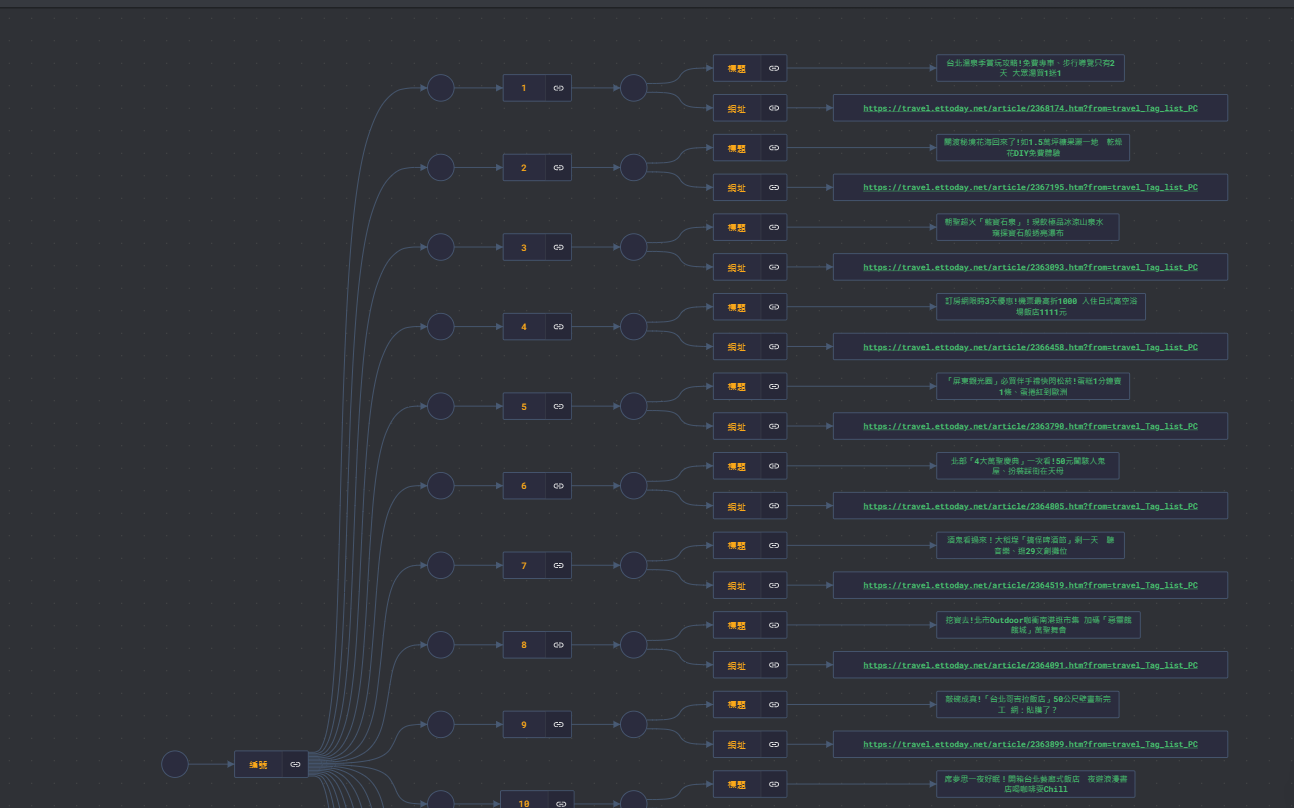